In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [15]:
data = pd.read_parquet("PlaylistTracks.parquet")

In [16]:
x = data.loc[:, ['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs']].values

In [34]:
x

array([[3.52000e-01, 9.11000e-01, 6.47000e-01, 5.03000e-01, 1.58025e+02,
        2.52000e+02],
       [1.15000e-01, 6.46000e-01, 9.57000e-01, 3.67000e-01, 1.67241e+02,
        2.59000e+02],
       [2.82000e-01, 8.97000e-01, 8.13000e-01, 2.02000e-01, 1.00089e+02,
        1.95000e+02],
       ...,
       [3.48000e-01, 9.37000e-01, 7.35000e-04, 2.69000e-01, 1.60006e+02,
        2.62000e+02],
       [6.75000e-01, 9.20000e-01, 1.17000e-01, 3.29000e-01, 1.32001e+02,
        3.29000e+02],
       [4.56000e-01, 9.62000e-01, 8.14000e-02, 8.94000e-02, 1.40989e+02,
        2.11000e+02]])

In [17]:
wcss = []

In [18]:
for i in range(1,11,1):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

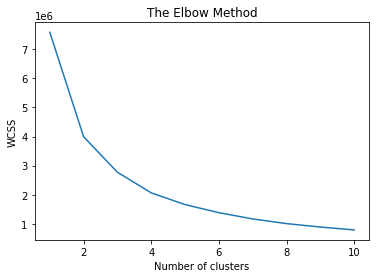

In [19]:
plt.plot(range(1,11,1),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [21]:
data['cluster'] = y_kmeans

In [22]:
data.groupby('cluster').agg({
    'danceability':np.mean,
    'energy':np.mean,
    'instrumentalness':np.mean,
    'liveness':np.mean,
    'tempo':np.mean,
    'track_duration_secs':np.mean
})

,danceability,energy,instrumentalness,liveness,tempo,track_duration_secs
cluster,,,,,,
0,0.455391,0.726213,0.196404,0.187896,128.974170,284.235828
1,0.459809,0.796710,0.122765,0.216323,131.915656,192.090663
2,0.356868,0.751553,0.266914,0.217558,129.403026,485.315789


PCA Analysis

In [24]:
data_pca = data.loc[:, ['danceability','energy','instrumentalness','liveness','tempo','track_duration_secs']]

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_pcs = pca.fit_transform(data_pca)

In [28]:
data_pcs

array([[ 17.11582301, -27.43144725],
       [ 24.02054813, -36.7190538 ],
       [-39.28222612,  31.0904594 ],
       ...,
       [ 27.09446663, -29.51580707],
       [ 94.38029383,  -2.20425032],
       [-23.70622109,  -9.97255985]])

In [36]:
wcss = []

In [37]:
for i in range(1,11,1):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(data_pcs)
    wcss.append(kmeans.inertia_)

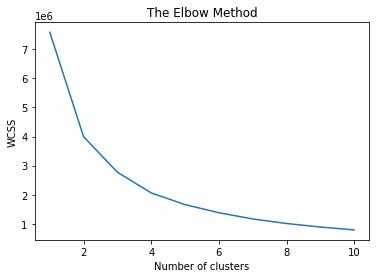

In [38]:
plt.plot(range(1,11,1),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()